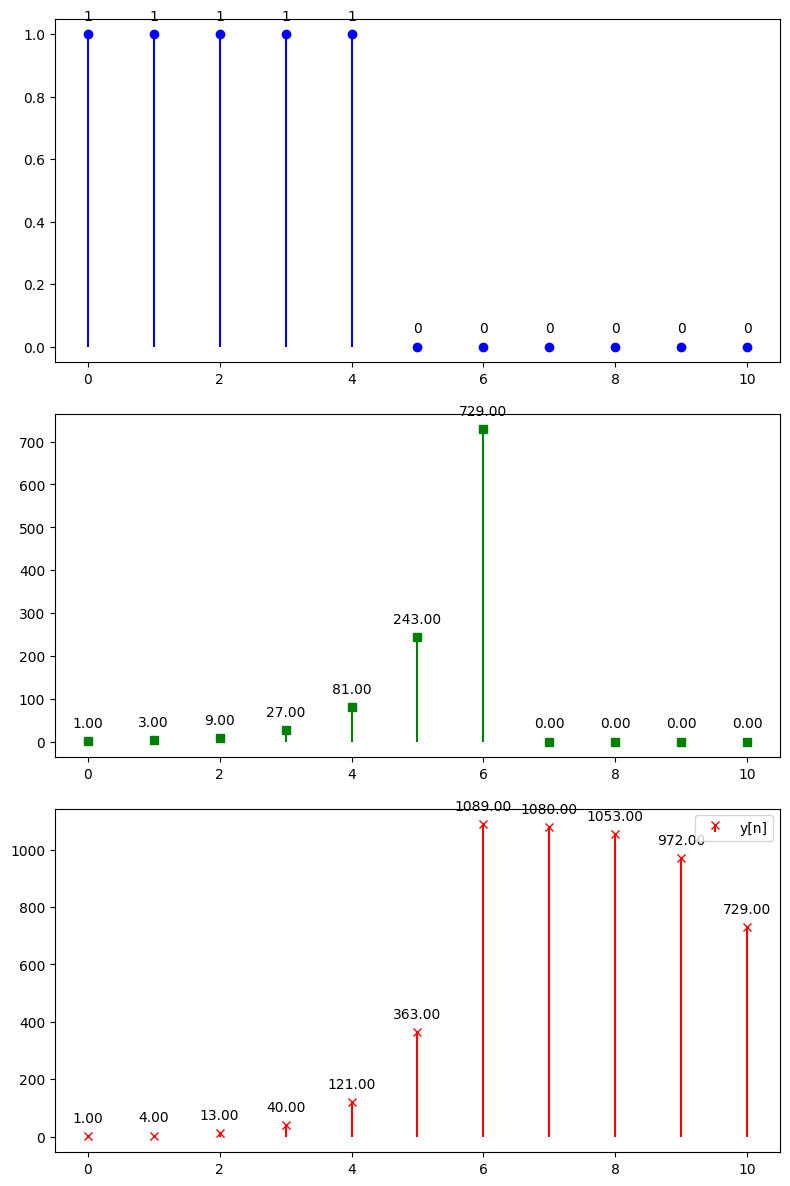

In [40]:
import numpy as np
import matplotlib.pyplot as plt
n = np.arange(0, 11)
def x(n):
    return np.where((n >= 0) & (n <= 4), 1, 0)
def h(n, alpha):
    h_values = np.zeros_like(n, dtype=float)
    for k in range(len(n)):
        if n[k] >= 0 and n[k] <= 6:
            h_values[k] = alpha**n[k]
    return h_values

def y(n, x, h):
    y_values = np.zeros_like(n, dtype=float)
    for k in range(len(n)):
        if n[k] >= 0 and n[k] <= 4:
            y_values[k] = np.sum(x(n) * h(n[k] - n, alpha))
        elif n[k] > 4 and n[k] <= 6:
            y_values[k] = (alpha**n[k]) * (1 - (1/alpha)**5) / (1 - (1/alpha))
        elif n[k] > 6 and n[k] <= 10:
            y_values[k] = (alpha**6) * (1 - (1/alpha)**(11 - n[k])) / (1 - (1/alpha))
        else:
            y_values[k] = 0
    return y_values
alpha = 3
y_values = y(n, x, h)
fig, axs = plt.subplots(3, 1, figsize=(8, 12))
x_values = x(n)
axs[0].stem(n, x_values, 'b', basefmt=" ", linefmt="b-o", markerfmt="bo", label='x[n]')

for i, val in enumerate(x_values):
    axs[0].annotate(f'{val}', (n[i], val), textcoords="offset points", xytext=(0, 10), ha='center')
h_values = h(n, alpha)
axs[1].stem(n, h_values, 'g', basefmt=" ", linefmt="g-s", markerfmt="gs", label='h[n]')

for i, val in enumerate(h_values):
    axs[1].annotate(f'{val:.2f}', (n[i], val), textcoords="offset points", xytext=(0, 10), ha='center')
axs[2].stem(n, y_values, 'r', basefmt=" ", linefmt="r-x", markerfmt="rx", label='y[n]')

for i, val in enumerate(y_values):
    axs[2].annotate(f'{val:.2f}', (n[i], val), textcoords="offset points", xytext=(0, 10), ha='center')
axs[2].legend(loc='upper right')
plt.tight_layout()
plt.show()


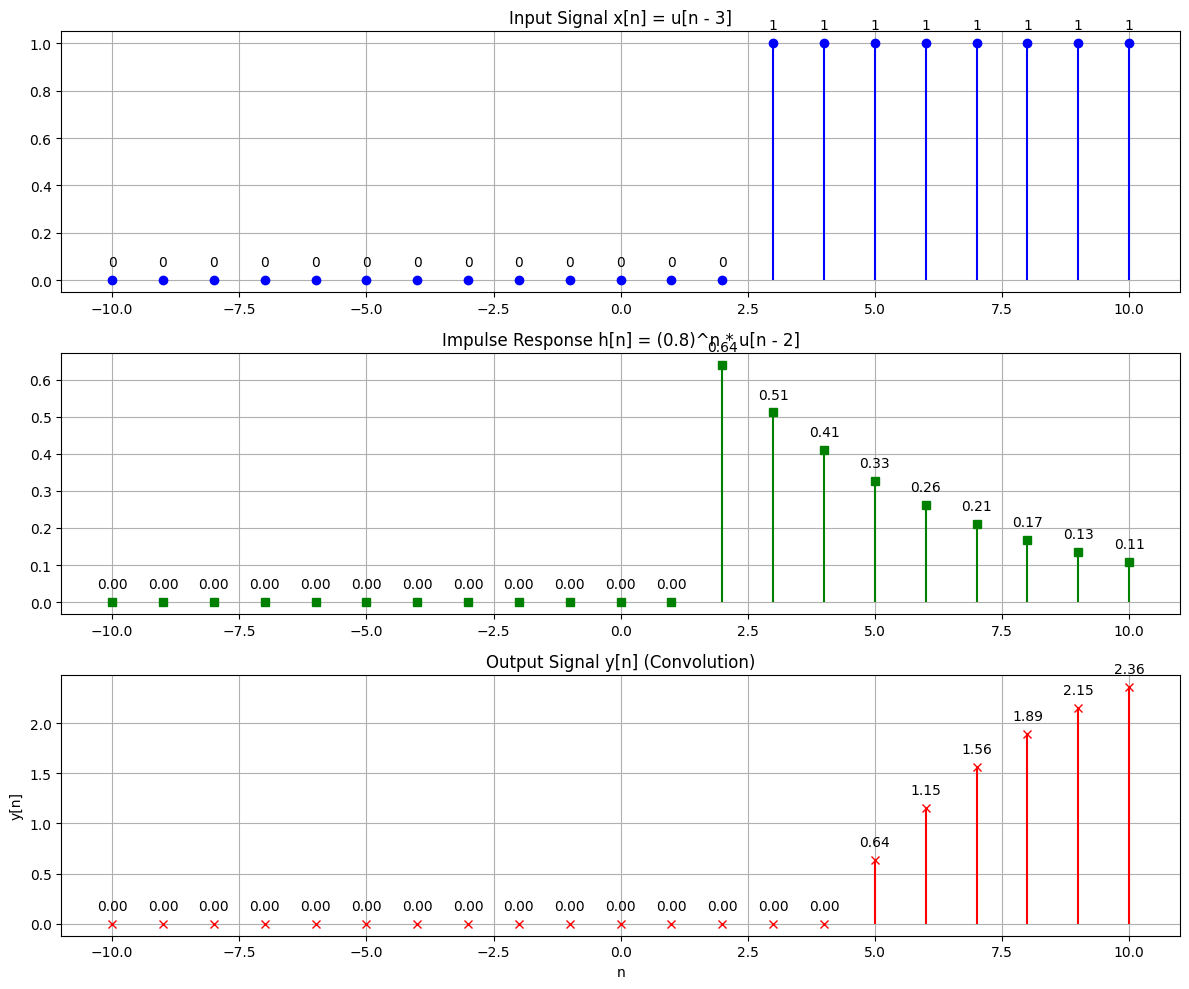

In [4]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(-10, 11)

def x(n):
    return np.where(n >= 3, 1, 0)

def h(n):
    return np.where(n >= 2, (0.8) ** n, 0)

def y(n, x, h):
    y_values = np.zeros_like(n, dtype=float)
    for k in range(len(n)):
        if n[k] < 5:
            y_values[k] = 0
        else:
            y_values[k] = (0.8 ** 2) * (1 - (0.8 ** (n[k] - 4))) / 0.2
    return y_values

y_values = y(n, x, h)

plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
x_values = x(n)
plt.stem(n, x_values, linefmt='b-', markerfmt='bo', basefmt=" ")
plt.title('Input Signal x[n] = u[n - 3]')
plt.grid(True)
for i, val in enumerate(x_values):
    plt.annotate(f'{val}', (n[i], val), textcoords="offset points", xytext=(0, 10), ha='center')

plt.subplot(3, 1, 2)
h_values = h(n)
plt.stem(n, h_values, linefmt='g-', markerfmt='gs', basefmt=" ")
plt.title('Impulse Response h[n] = (0.8)^n * u[n - 2]')
plt.grid(True)
for i, val in enumerate(h_values):
    plt.annotate(f'{val:.2f}', (n[i], val), textcoords="offset points", xytext=(0, 10), ha='center')

plt.subplot(3, 1, 3)
plt.stem(n, y_values, linefmt='r-', markerfmt='rx', basefmt=" ")
plt.title('Output Signal y[n] (Convolution)')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.grid(True)
for i, val in enumerate(y_values):
    plt.annotate(f'{val:.2f}', (n[i], val), textcoords="offset points", xytext=(0, 10), ha='center')

plt.tight_layout()
plt.show()
